## Deep folding sample

here, we optimize the step parameter $\eta$ of the gradient descent for the optimization of $x^2$.

In [19]:
from jax.lax import scan

def objective(x0, eta, max_itr):
    x = x0
    def gd_onetime(x, null):
        dx = 2.0*x # d objective / dx 
        return x - dx*eta, null
    x,_ = scan(gd_onetime,x0,None,max_itr)
    return x**2 #objective 

In [20]:
objective(1.0, 0.1, 30)

Array(1.5324955e-06, dtype=float32, weak_type=True)

In [22]:
from jax import grad
dobj = grad(objective, argnums=(0,1))

In [23]:
dobj(1.0,0.1,30)

(Array(3.0649921e-06, dtype=float32, weak_type=True),
 Array(-0.00022987, dtype=float32, weak_type=True))

The initial value obeys a random Gaussian, $x_0 \sim \mathcal{N}(0,1)$ 

In [59]:
from jaxopt import OptaxSolver
import optax
import numpy as np
import tqdm

N=200
np.random.seed(1)
def objective_f(eta):
    return objective(np.random.randn(), eta, 3)

initpar = 0.0
adam = OptaxSolver(opt=optax.adam(0.2),fun=objective_f)
state = adam.init_state(initpar)
params_a = np.copy(initpar)

params_adam = []
for _ in tqdm.tqdm(range(N)):
    params_a, state = adam.update(params_a, state)
    params_adam.append(params_a)





100%|██████████| 200/200 [00:00<00:00, 1212.25it/s]


Text(0.5, 0, '# of iteration')

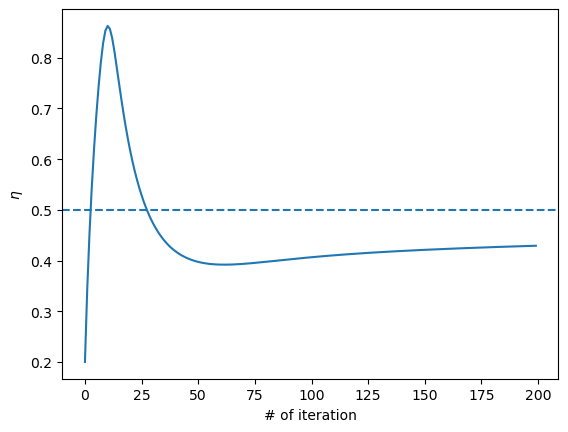

In [62]:
import matplotlib.pyplot as plt
plt.plot(params_adam)
plt.axhline(0.5,ls="dashed")
plt.ylabel("$\\eta$")
plt.xlabel("# of iteration")